<a href="https://colab.research.google.com/github/Manish-2708/pyt_man/blob/main/Assignment4_Q2_Linearregression.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
# For reading data set
# importing necessary libraries
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt

In [3]:
# reading a csv file using pandas library
data=pd.read_csv("/content/Salary_Data (1).csv")
data.columns

Index(['YearsExperience', 'Salary'], dtype='object')

(array([4., 2., 5., 4., 3., 2., 2., 2., 3., 3.]),
 array([ 1.1 ,  2.04,  2.98,  3.92,  4.86,  5.8 ,  6.74,  7.68,  8.62,
         9.56, 10.5 ]),
 <BarContainer object of 10 artists>)

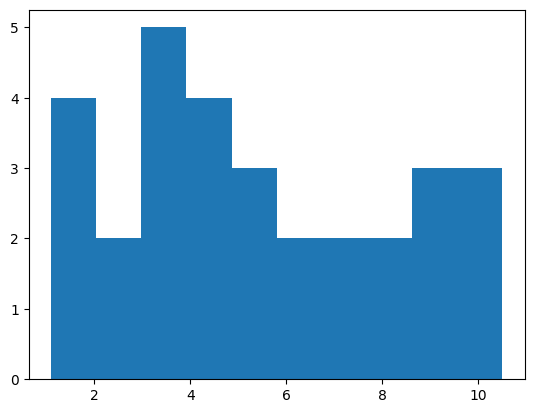

In [4]:
plt.hist(data.YearsExperience)

{'whiskers': [<matplotlib.lines.Line2D at 0x7f0a1df82c40>,
 'caps': [<matplotlib.lines.Line2D at 0x7f0a1df82eb0>,
 'boxes': [<matplotlib.lines.Line2D at 0x7f0a1df829a0>],
 'medians': [<matplotlib.lines.Line2D at 0x7f0a1df99430>],
 'fliers': [<matplotlib.lines.Line2D at 0x7f0a1df996d0>],
 'means': []}

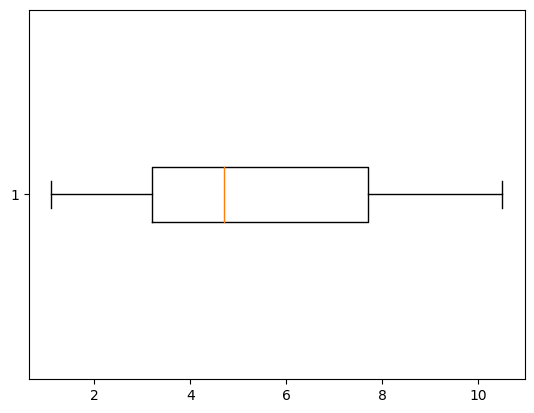

In [5]:
plt.boxplot(data.YearsExperience,0,"rs",0)

(array([4., 2., 7., 4., 0., 2., 2., 2., 4., 3.]),
 array([ 37731.,  46197.,  54663.,  63129.,  71595.,  80061.,  88527.,
         96993., 105459., 113925., 122391.]),
 <BarContainer object of 10 artists>)

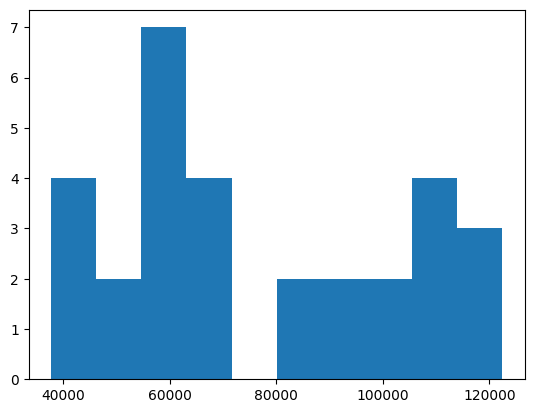

In [6]:
plt.hist(data.Salary)

{'whiskers': [<matplotlib.lines.Line2D at 0x7f0a1de89400>,
 'caps': [<matplotlib.lines.Line2D at 0x7f0a1de897f0>,
 'boxes': [<matplotlib.lines.Line2D at 0x7f0a1de89160>],
 'medians': [<matplotlib.lines.Line2D at 0x7f0a1de89d60>],
 'fliers': [<matplotlib.lines.Line2D at 0x7f0a1de97040>],
 'means': []}

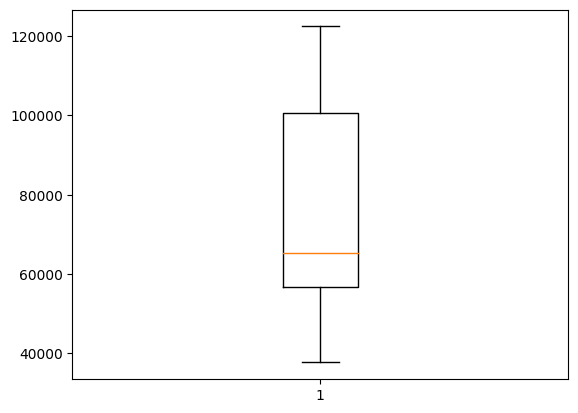

In [7]:
plt.boxplot(data.Salary)

Text(0, 0.5, 'Salary')

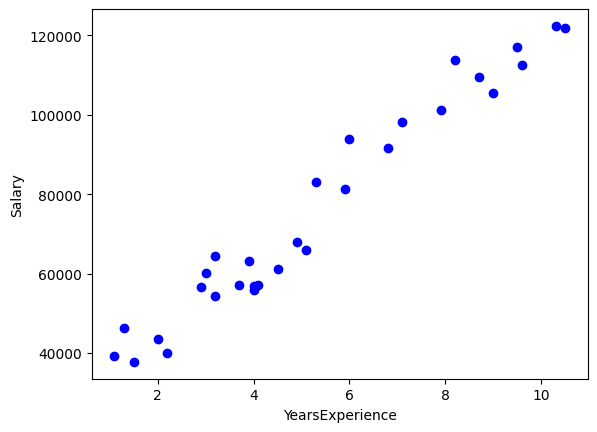

In [8]:
plt.plot(data.YearsExperience,data.Salary,"bo");plt.xlabel("YearsExperience");plt.ylabel("Salary")

In [9]:
data.YearsExperience.corr(data.Salary) # # correlation value between X and Y
np.corrcoef(data.Salary,data.YearsExperience)

array([[1.        , 0.97824162],
       [0.97824162, 1.        ]])

In [10]:
# For preparing linear regression model we need to import the statsmodels.formula.api
import statsmodels.formula.api as smf
model=smf.ols("Salary~YearsExperience",data=data).fit()

In [11]:
# For getting coefficients of the varibles used in equation
model.params

Intercept          25792.200199
YearsExperience     9449.962321
dtype: float64

In [12]:
# P-values for the variables and R-squared value for prepared model
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                 Salary   R-squared:                       0.957
Model:                            OLS   Adj. R-squared:                  0.955
Method:                 Least Squares   F-statistic:                     622.5
Date:                Thu, 06 Apr 2023   Prob (F-statistic):           1.14e-20
Time:                        04:18:05   Log-Likelihood:                -301.44
No. Observations:                  30   AIC:                             606.9
Df Residuals:                      28   BIC:                             609.7
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
===================================================================================
                      coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------
Intercept        2.579e+04   2273.053     11.347      0.000    2.11e+04    3.04e+04
YearsExperience  9449.9623    378.755     24.950      0.000    8674.119    1.02e+04
==============================================================================
Omnibus:                        2.140   Durbin-Watson:                   1.648
Prob(Omnibus):                  0.343   Jarque-Bera (JB):                1.569
Skew:                           0.363   Prob(JB):                        0.456
Kurtosis:                       2.147   Cond. No.                         13.2
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [13]:
model.conf_int(0.05) # 95% confidence interval

,0,1
Intercept,21136.061314,30448.339084
YearsExperience,8674.118747,10225.805896


In [14]:
pred = model.predict(data.iloc[:,0]) # Predicted values of AT using the model

Text(0, 0.5, 'Salary')

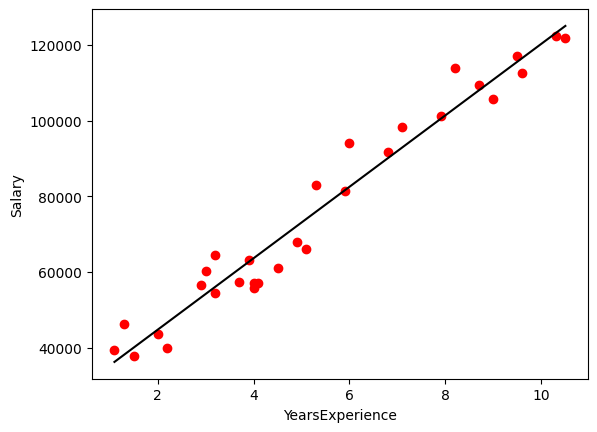

In [15]:
# Visualization of regresion line over the scatter plot of YearsExperience and Salary
# For visualization we need to import matplotlib.pyplot
import matplotlib.pylab as plt
plt.scatter(x=data['YearsExperience'],y=data['Salary'],color='red');plt.plot(data['YearsExperience'],pred,color='black');plt.xlabel('YearsExperience');plt.ylabel('Salary')

In [16]:
pred.corr(data.Salary) # 0.978

0.9782416184887601

In [17]:
# Transforming variables for accuracy
model2 = smf.ols('Salary~np.log(YearsExperience)',data=data).fit()
model2.params
model2.summary()
print(model2.conf_int(0.01)) # 99% confidence level
pred2 = model2.predict(pd.DataFrame(data['YearsExperience']))
pred2.corr(data.Salary)

                                    0             1
Intercept                  679.965646  29175.977894
np.log(YearsExperience)  31815.666558  49348.309362


0.924061081788264

Text(0, 0.5, 'Salary')

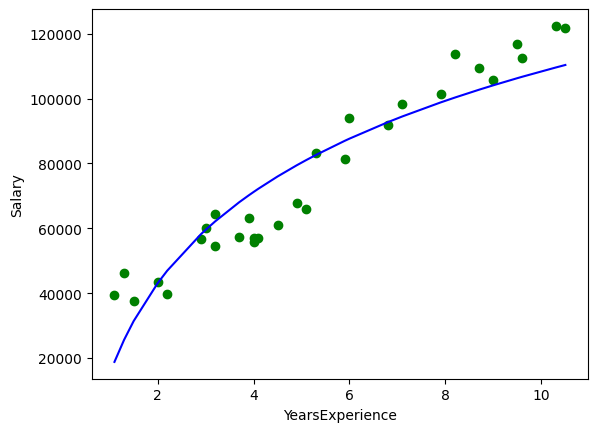

In [18]:
# pred2 = model2.predict(data.iloc[:,0])
pred2
plt.scatter(x=data['YearsExperience'],y=data['Salary'],color='green');plt.plot(data['YearsExperience'],pred2,color='blue');plt.xlabel('YearsExperience');plt.ylabel('Salary')

                         0          1
Intercept        10.401175  10.613629
YearsExperience   0.107752   0.143153


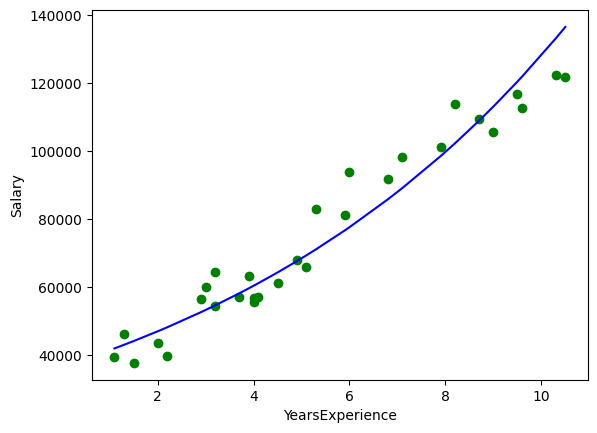

In [19]:
# Exponential transformation
model3 = smf.ols('np.log(Salary)~YearsExperience',data=data).fit()
model3.params
model3.summary()
print(model3.conf_int(0.01)) # 99% confidence level
pred_log = model3.predict(pd.DataFrame(data['YearsExperience']))
pred_log
pred3=np.exp(pred_log)  # as we have used log(Salary) in preparing model so we need to convert it back
pred3
pred3.corr(data.Salary)
plt.scatter(x=data['YearsExperience'],y=data['Salary'],color='green');plt.plot(data.YearsExperience,np.exp(pred_log),color='blue');plt.xlabel('YearsExperience');plt.ylabel('Salary')
resid_3 = pred3-data.Salary

Text(0, 0.5, 'Standardized Residual')

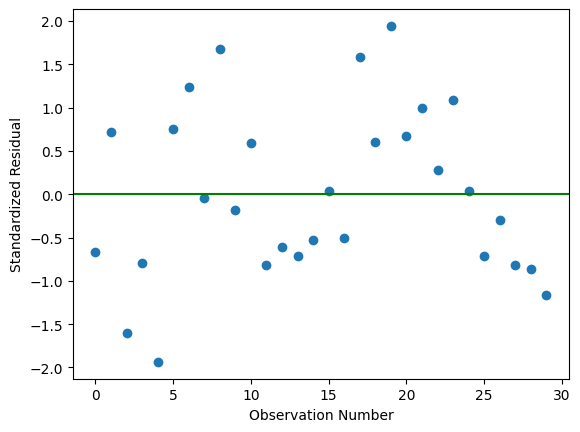

In [20]:
# so we will consider the model having highest R-Squared value which is the log transformation - model3
# getting residuals of the entire data set
student_resid = model3.resid_pearson 
student_resid
plt.plot(model3.resid_pearson,'o');plt.axhline(y=0,color='green');plt.xlabel("Observation Number");plt.ylabel("Standardized Residual")

Text(0, 0.5, 'Actual')

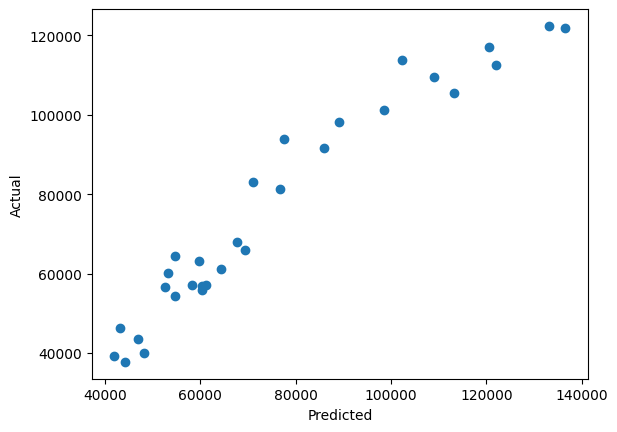

In [21]:
# Predicted vs actual values
plt.scatter(x=pred3,y=data.Salary);plt.xlabel("Predicted");plt.ylabel("Actual")

In [28]:
# Quadratic model
YearsExperience_Sq = data.YearsExperience*data.YearsExperience
model_quad = smf.ols("Salary~YearsExperience+YearsExperience_Sq",data=data).fit()
model_quad.params
model_quad.summary()


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                 Salary   R-squared:                       0.957
Model:                            OLS   Adj. R-squared:                  0.954
Method:                 Least Squares   F-statistic:                     300.3
Date:                Thu, 06 Apr 2023   Prob (F-statistic):           3.59e-19
Time:                        04:25:13   Log-Likelihood:                -301.43
No. Observations:                  30   AIC:                             608.9
Df Residuals:                      27   BIC:                             613.1
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
======================================================================================
                         coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------
Intercept           2.621e+04   4554.674      5.756      0.000    1.69e+04    3.56e+04
YearsExperience     9259.2839   1811.007      5.113      0.000    5543.405     1.3e+04
YearsExperience_Sq    16.3926    152.121      0.108      0.915    -295.734     328.520
==============================================================================
Omnibus:                        2.181   Durbin-Watson:                   1.649
Prob(Omnibus):                  0.336   Jarque-Bera (JB):                1.627
Skew:                           0.384   Prob(JB):                        0.443
Kurtosis:                       2.156   Cond. No.                         223.
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [30]:
pred_quad = model_quad.predict(data.YearsExperience)

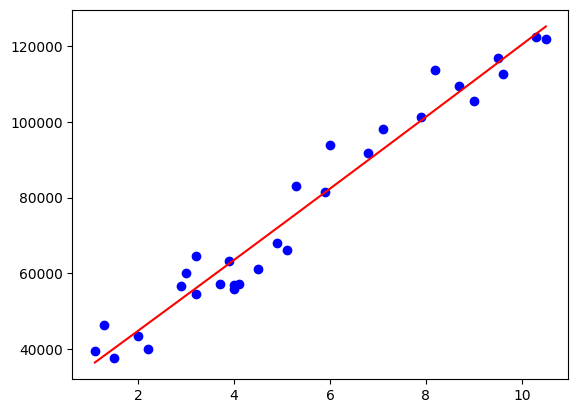

In [31]:
model_quad.conf_int(0.05) # 
plt.scatter(data.YearsExperience,data.Salary,c="b");plt.plot(data.YearsExperience,pred_quad,"r")

Text(0, 0.5, 'Standardized Residual')

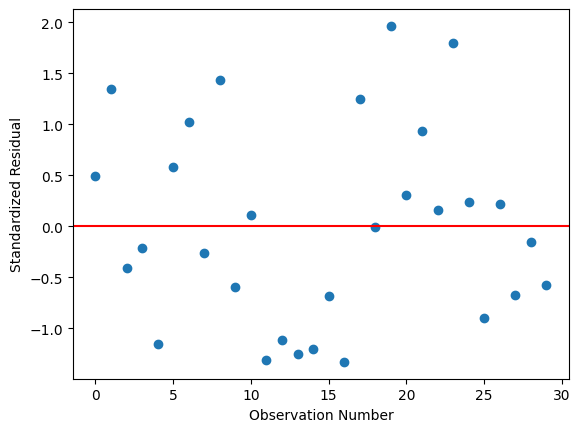

In [33]:
plt.scatter(np.arange(30),model_quad.resid_pearson);plt.axhline(y=0,color='red');plt.xlabel("Observation Number");plt.ylabel("Standardized Residual")

(array([6., 3., 3., 3., 6., 2., 1., 2., 2., 2.]),
 array([-1.32942469, -0.99999975, -0.6705748 , -0.34114986, -0.01172492,
         0.31770002,  0.64712497,  0.97654991,  1.30597485,  1.63539979,
         1.96482474]),
 <BarContainer object of 10 artists>)

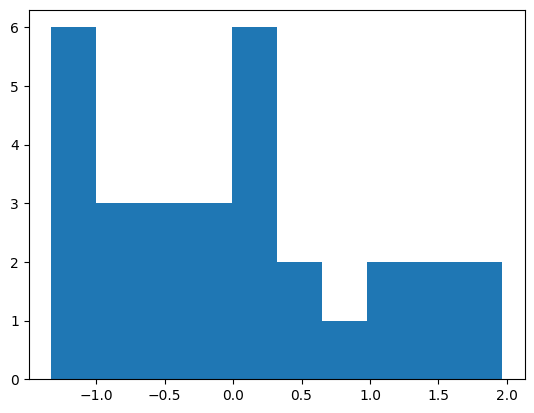

In [34]:
plt.hist(model_quad.resid_pearson) # histogram for residual values 

In [ ]:
############################### Implementing the Linear Regression model from sklearn library

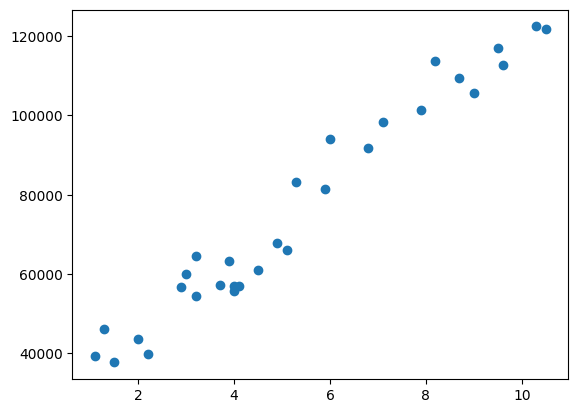

In [35]:
from sklearn.linear_model import LinearRegression
import numpy as np
plt.scatter(data.YearsExperience,data.Salary)
model1 = LinearRegression()
model1.fit(data.YearsExperience.values.reshape(-1,1),data.Salary)
pred1 = model1.predict(data.YearsExperience.values.reshape(-1,1))

In [38]:
# Adjusted R-Squared value
model1.score(data.YearsExperience.values.reshape(-1,1),data.Salary) #0.9569
rmse1 = np.sqrt(np.mean((pred1-data.Salary)**2)) 
model1.coef_
model1.intercept_

25792.200198668696

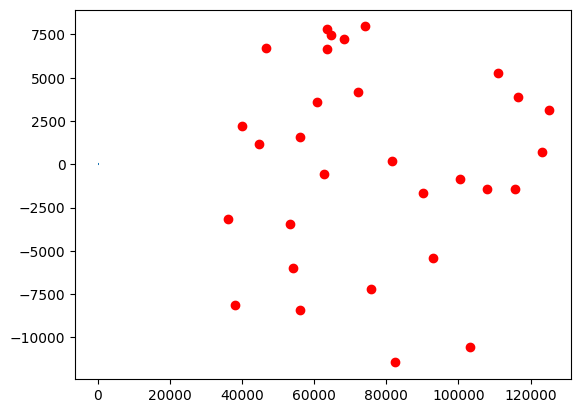

In [41]:
#### Residuals Vs Fitted values
import matplotlib.pyplot as plt
plt.scatter(pred1,(pred1-data.Salary),c="r")
plt.hlines(y=0,xmin=0,xmax=300)

(array([2., 2., 2., 1., 2., 6., 3., 4., 2., 6.]),
 array([-11448.0258726 ,  -9507.42248153,  -7566.81909046,  -5626.21569939,
         -3685.61230832,  -1745.00891726,    195.59447381,   2136.19786488,
          4076.80125595,   6017.40464702,   7958.00803809]),
 <BarContainer object of 10 artists>)

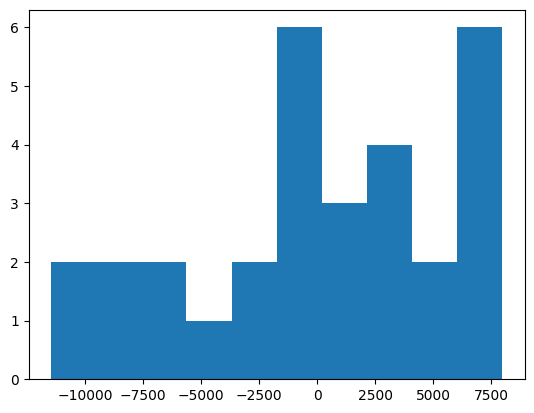

In [42]:
# checking normal distribution for residual
plt.hist(pred1-data.Salary)

In [43]:
### Fitting Quadratic Regression 
data["YearsExperience_sqrd"] = data.YearsExperience*data.YearsExperience
model2 = LinearRegression()
model2.fit(X = data.iloc[:,[0,2]],y=data.Salary)
pred2 = model2.predict(data.iloc[:,[0,2]])

In [44]:
# Adjusted R-Squared value
model2.score(data.iloc[:,[0,2]],data.Salary)
rmse2 = np.sqrt(np.mean((pred2-data.Salary)**2)) 
model2.coef_
model2.intercept_

26214.932677059565

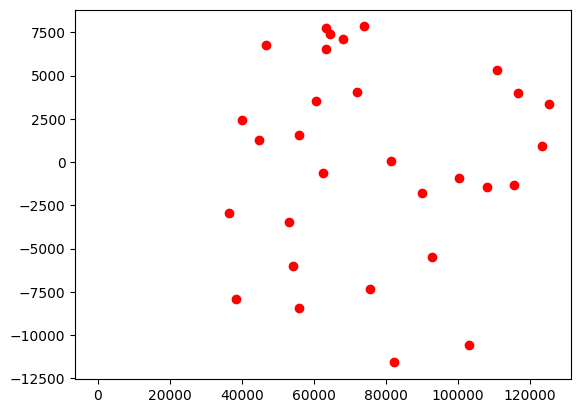

In [45]:
#### Residuals Vs Fitted values
import matplotlib.pyplot as plt
plt.scatter(pred2,(pred2-data.Salary),c="r")
plt.hlines(y=0,xmin=0,xmax=200)  

(array([2., 2., 2., 1., 2., 6., 3., 3., 3., 6.]),
 array([-11579.23160621,  -9637.8433299 ,  -7696.45505359,  -5755.06677728,
         -3813.67850097,  -1872.29022467,     69.09805164,   2010.48632795,
          3951.87460426,   5893.26288057,   7834.65115687]),
 <BarContainer object of 10 artists>)

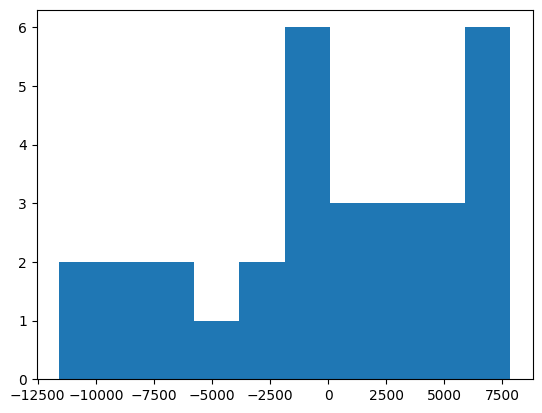

In [46]:
# Checking normal distribution
plt.hist(pred2-data.Salary)

((array([-1.99833768, -1.59452553, -1.35103668, -1.1686393 , -1.01855497,
         -0.8884856 , -0.77194854, -0.66506298, -0.56529149, -0.47085985,
         -0.38045711, -0.29306636, -0.20786198, -0.12414301, -0.04128669,
          0.04128669,  0.12414301,  0.20786198,  0.29306636,  0.38045711,
          0.47085985,  0.56529149,  0.66506298,  0.77194854,  0.8884856 ,
          1.01855497,  1.1686393 ,  1.35103668,  1.59452553,  1.99833768]),
  array([-11579.23160621, -10568.70328032,  -8432.49900158,  -7925.2948312 ,
          -7338.39552754,  -6009.68256145,  -5490.80244851,  -3437.2825644 ,
          -2923.02004067,  -1801.94461653,  -1419.54415082,  -1311.44127464,
           -915.66454211,   -642.52922522,     52.33285105,    933.64408643,
           1274.07071874,   1567.50099842,   2409.74178358,   3372.69393997,
           3509.69729633,   3979.79691585,   4041.00924659,   5294.2855428 ,
           6557.34929099,   6773.69725209,   7102.65964195,   7372.55565853,
           7720

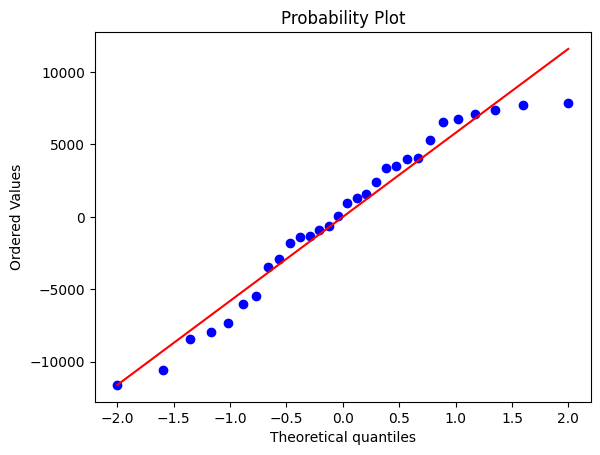

In [47]:
import pylab
import scipy.stats as st
st.probplot(pred2-data.Salary,dist="norm",plot=pylab)

In [48]:
# Let us prepare a model by applying transformation on dependent variable
data["Salary_sqrt"] = np.sqrt(data.Salary)

In [49]:
model3 = LinearRegression()
model3.fit(X = data.iloc[:,[0,2]],y=data.Salary_sqrt)
pred3 = model3.predict(data.iloc[:,[0,2]])

In [50]:
# Adjusted R-Squared value
model3.score(data.iloc[:,[0,2]],data.Salary_sqrt)
rmse3 = np.sqrt(np.mean(((pred3)**2-data.Salary)**2))
model3.coef_
model3.intercept_

169.80875293828598

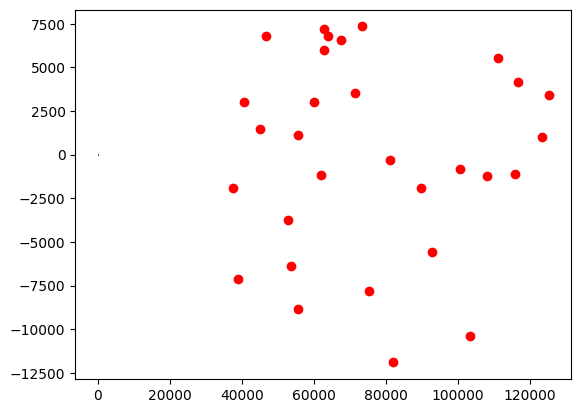

In [51]:
#### Residuals Vs Fitted values
import matplotlib.pyplot as plt
plt.scatter((pred3)**2,((pred3)**2-data.Salary),c="r")
plt.hlines(y=0,xmin=0,xmax=300)  

((array([-1.99833768, -1.59452553, -1.35103668, -1.1686393 , -1.01855497,
         -0.8884856 , -0.77194854, -0.66506298, -0.56529149, -0.47085985,
         -0.38045711, -0.29306636, -0.20786198, -0.12414301, -0.04128669,
          0.04128669,  0.12414301,  0.20786198,  0.29306636,  0.38045711,
          0.47085985,  0.56529149,  0.66506298,  0.77194854,  0.8884856 ,
          1.01855497,  1.1686393 ,  1.35103668,  1.59452553,  1.99833768]),
  array([-11903.66559887, -10412.35581775,  -8850.17134139,  -7802.44700432,
          -7137.49206633,  -6365.24096784,  -5552.72464198,  -3756.86998393,
          -1935.62436397,  -1914.72053895,  -1207.13358311,  -1184.63606668,
          -1096.82901194,   -808.37052792,   -294.37698233,   1010.48148507,
           1149.82865861,   1443.54622547,   2989.51363219,   2997.22880675,
           3389.0400768 ,   3520.69723584,   4185.58323899,   5521.61096137,
           6007.98770764,   6550.32832533,   6806.89840384,   6818.28451061,
           7170

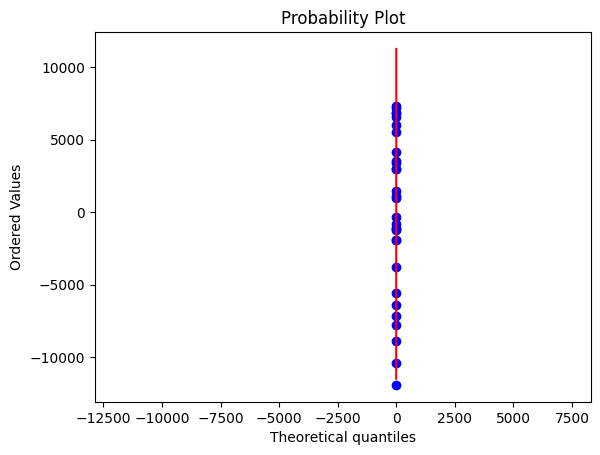

In [52]:
# checking normal distribution for residuals 
plt.hist((pred3)**2-data.Salary)
st.probplot((pred3)**2-data.Salary,dist="norm",plot=pylab)

In [54]:
# Let us prepare a model by applying transformation on dependent variable without transformation on input variables 
model4 = LinearRegression()
model4.fit(X = data.YearsExperience.values.reshape(-1,1),y=data.Salary_sqrt)
pred4 = model4.predict(data.YearsExperience.values.reshape(-1,1))

In [55]:
# Adjusted R-Squared value
model4.score(data.YearsExperience.values.reshape(-1,1),data.Salary_sqrt)
rmse4 = np.sqrt(np.mean(((pred4)**2-data.Salary)**2)) 
model4.coef_
model4.intercept_

180.70022140543102

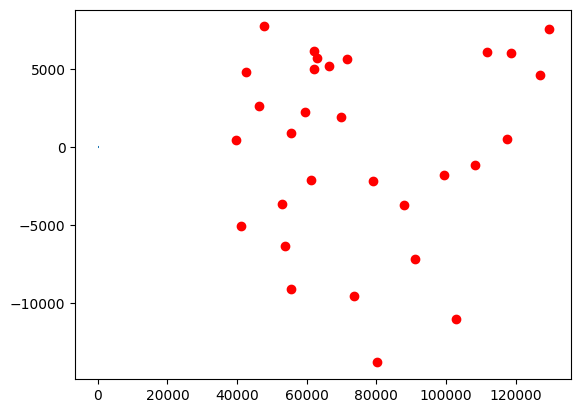

In [56]:
#### Residuals Vs Fitted values
import matplotlib.pyplot as plt
plt.scatter((pred4)**2,((pred4)**2-data.Salary),c="r")
plt.hlines(y=0,xmin=0,xmax=300)  

((array([-1.99833768, -1.59452553, -1.35103668, -1.1686393 , -1.01855497,
         -0.8884856 , -0.77194854, -0.66506298, -0.56529149, -0.47085985,
         -0.38045711, -0.29306636, -0.20786198, -0.12414301, -0.04128669,
          0.04128669,  0.12414301,  0.20786198,  0.29306636,  0.38045711,
          0.47085985,  0.56529149,  0.66506298,  0.77194854,  0.8884856 ,
          1.01855497,  1.1686393 ,  1.35103668,  1.59452553,  1.99833768]),
  array([-13828.69028846, -11050.86024821,  -9592.87606245,  -9087.7927052 ,
          -7188.79486389,  -6386.38770647,  -5047.25654489,  -3716.2247755 ,
          -3666.45744854,  -2214.31520188,  -2099.92727082,  -1795.3008483 ,
          -1129.42246716,    442.25167088,    499.84027951,    912.2072948 ,
           1904.45347807,   2254.01864794,   2619.74762985,   4617.48739174,
           4822.50926219,   5007.32752837,   5171.87910997,   5628.15169638,
           5735.40083327,   6005.93139855,   6113.66227   ,   6170.32752837,
           7579

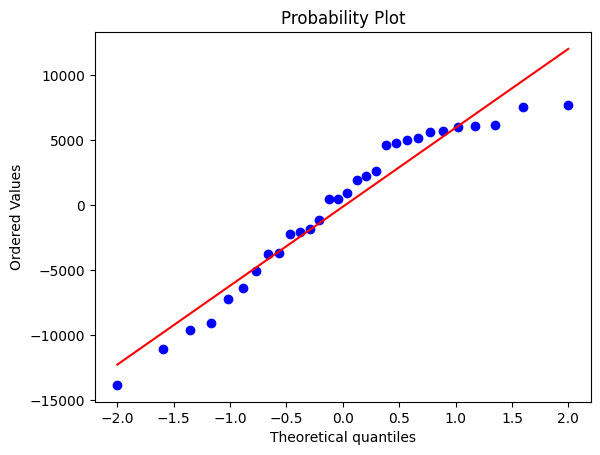

In [57]:
st.probplot((pred4)**2-data.Salary,dist="norm",plot=pylab)

(array([1., 2., 1., 2., 3., 4., 3., 3., 4., 7.]),
 array([-13828.69028846, -11672.72400793,  -9516.75772739,  -7360.79144686,
         -5204.82516632,  -3048.85888579,   -892.89260525,   1263.07367528,
          3419.03995582,   5575.00623635,   7730.97251689]),
 <BarContainer object of 10 artists>)

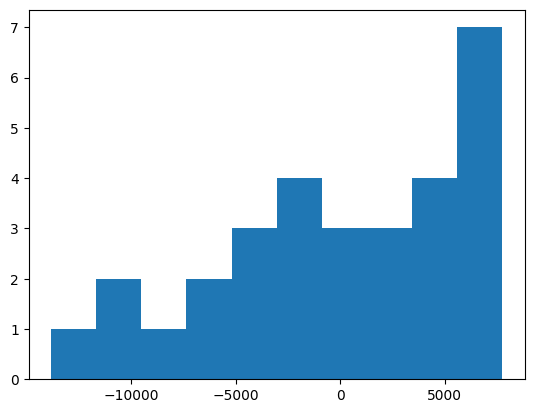

In [58]:
# Checking normal distribution for residuals 
plt.hist((pred4)**2-data.Salary)